In [69]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df=pd.read_csv('climate_action_data.csv')
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [71]:
df.columns

Index(['Sensor_ID', 'Date', 'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)',
       'Humidity(%)', 'Crop_Type', 'Fertilizer_Recommended(kg/ha)',
       'Irrigation_Recommended(mm)', 'Drone_Image_ID'],
      dtype='object')

In [72]:
#handling missing values(you first check for missing values)
df.isnull().sum() 


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [73]:
df.replace(['error', ''], py.nan, inplace=True)

In [74]:
print(df.duplicated().sum())

111


In [75]:
df.drop_duplicates(inplace=True)


In [76]:
print(df.duplicated().sum())

0


In [77]:
#columns to correct datatypes
num_cols=['Soil_Moisture(%)','Soil_pH','Temperature(C)','Humidity(%)','Fertilizer_Recommended(kg/ha)','Irrigation_Recommended(mm)']   
for col in num_cols:
    df[col]=pd.to_numeric(df[col], errors='coerce')

In [78]:
print(df.isnull().sum())

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64


In [79]:
#for where Date is missingwe drop the rows
df.dropna(subset=['Date'], inplace=True)

In [80]:
print(df.isnull().sum())

Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64


In [81]:
#where we have missing values in numeric columns we fill with the mean
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.mean()))

In [82]:
df['Crop_Type'] = df['Crop_Type'].fillna('Unknown')


In [83]:
print(df.isnull().sum())
print(df.info())

Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sensor_ID                      798 non-null    object 
 1   Date                           798 non-null    object 
 2   Soil_Moisture(%)               798 non-null    float64
 3   Soil_pH                        798 non-null    float64
 4   Temperature(C)                 798 non-null    float64
 5   Humidity(%)                    798 non-null    float64
 6   Crop_Type                      798 non-null    objec

In [92]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year for analysis
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [ ]:
#exporting the cleaned data to a new CSV file
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)

In [94]:
print(df.shape)

(798, 12)


Text(0.5, 1.0, 'Soil Moisture vs Temperature')

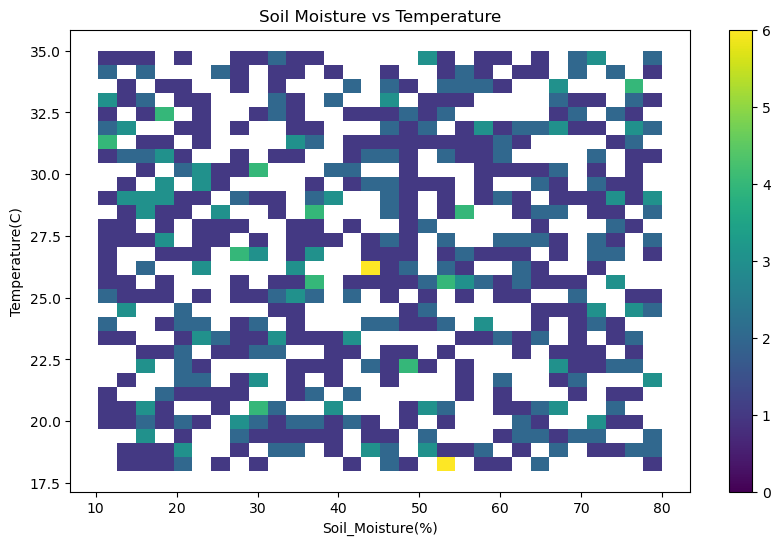

In [99]:
#histogram of relatiomship between Soil Moisture and Temperature
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Soil_Moisture(%)', y='Temperature(C)', bins=30, cmap='viridis', cbar=True)
plt.title('Soil Moisture vs Temperature')

Text(0.5, 1.0, 'Soil Moisture vs Humidity')

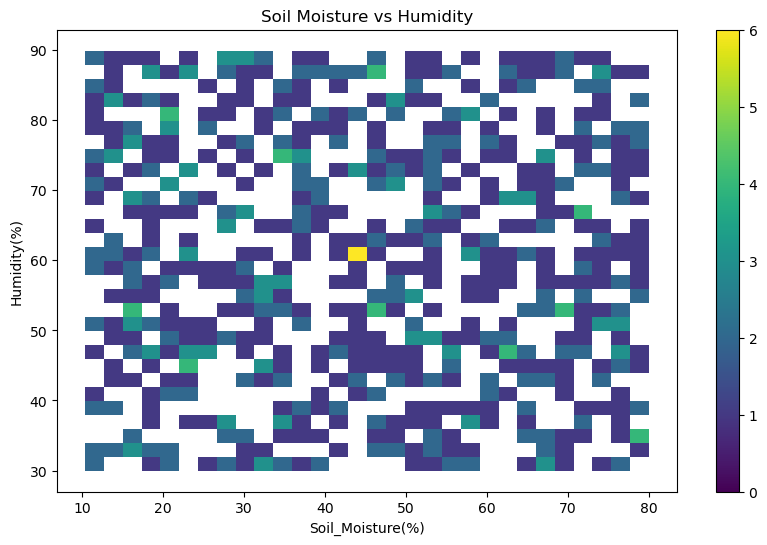

In [100]:
#histogram of Soil Moisture and Humidity
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Soil_Moisture(%)', y='Humidity(%)', bins=30, cmap='viridis', cbar=True)
plt.title('Soil Moisture vs Humidity')

Text(0.5, 1.0, 'Soil Moisture vs Fertilizer Recommended')

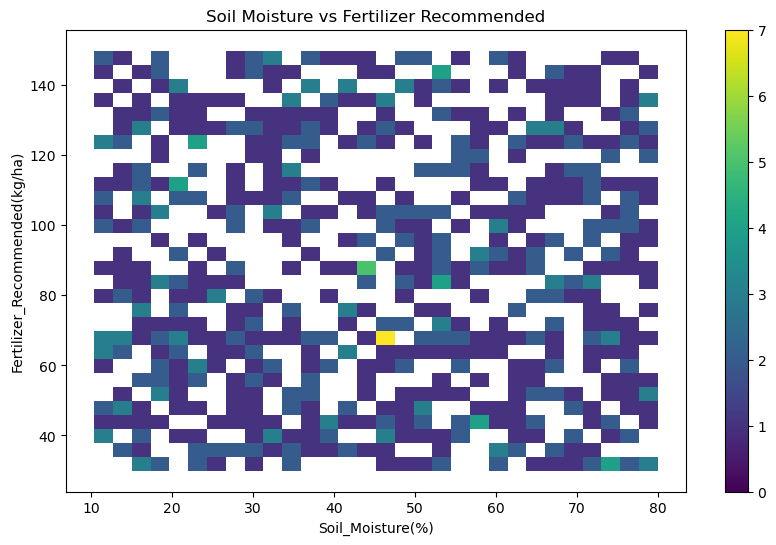

In [101]:
#histogram of Soil Moisture and Fertilizer Recommended
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Soil_Moisture(%)', y='Fertilizer_Recommended(kg/ha)', bins=30, cmap='viridis', cbar=True)
plt.title('Soil Moisture vs Fertilizer Recommended')

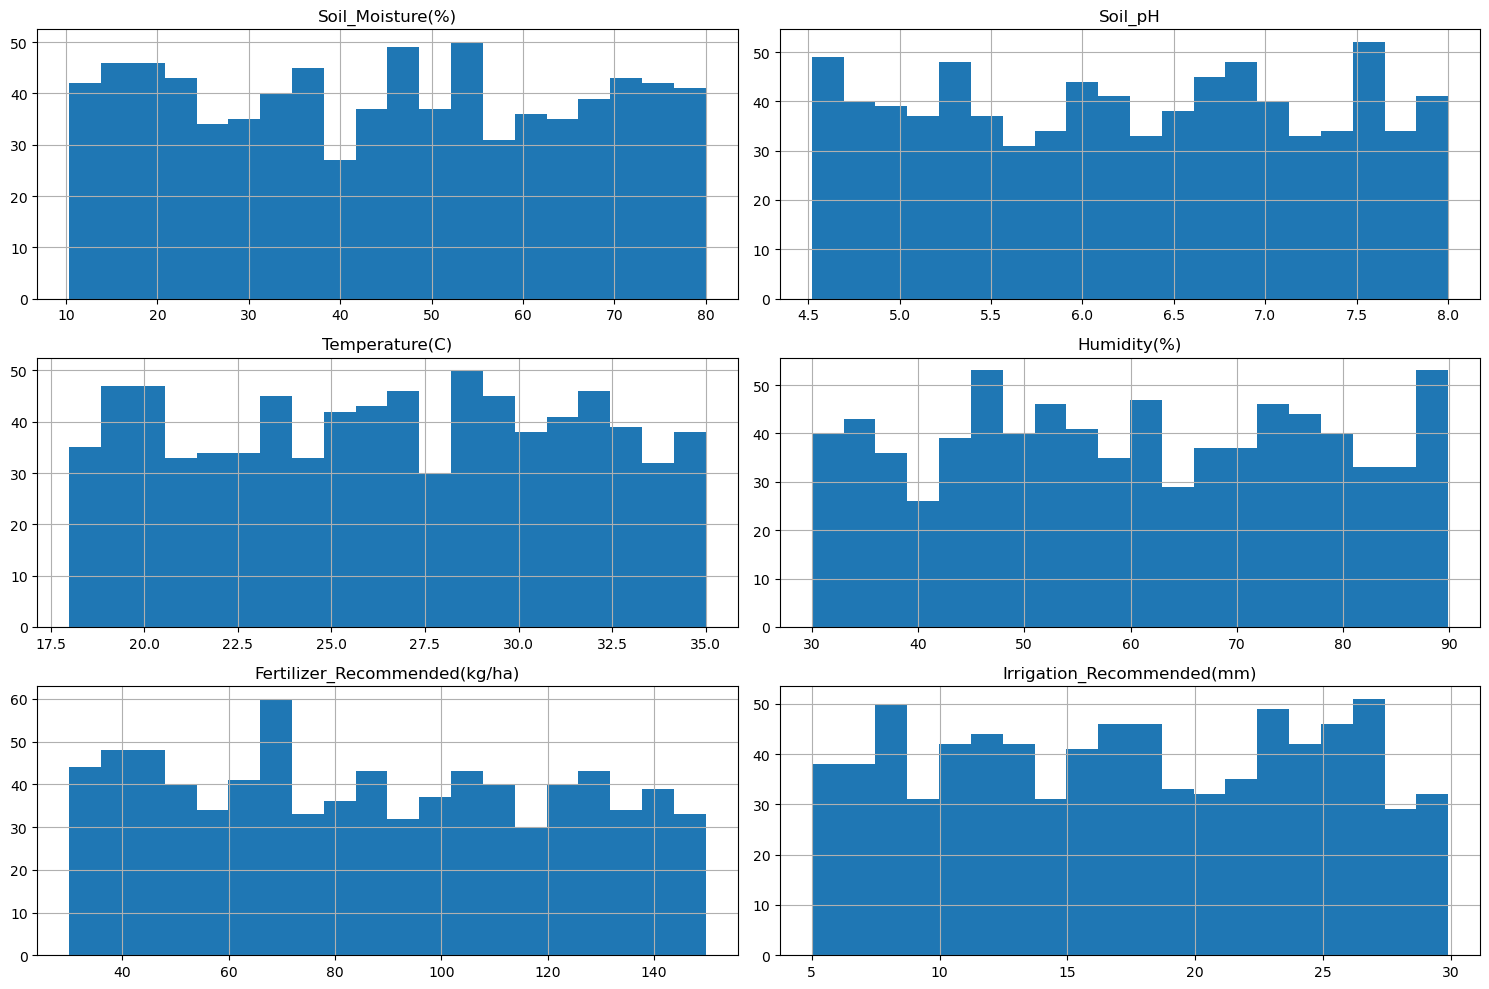

In [95]:
df[num_cols].hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

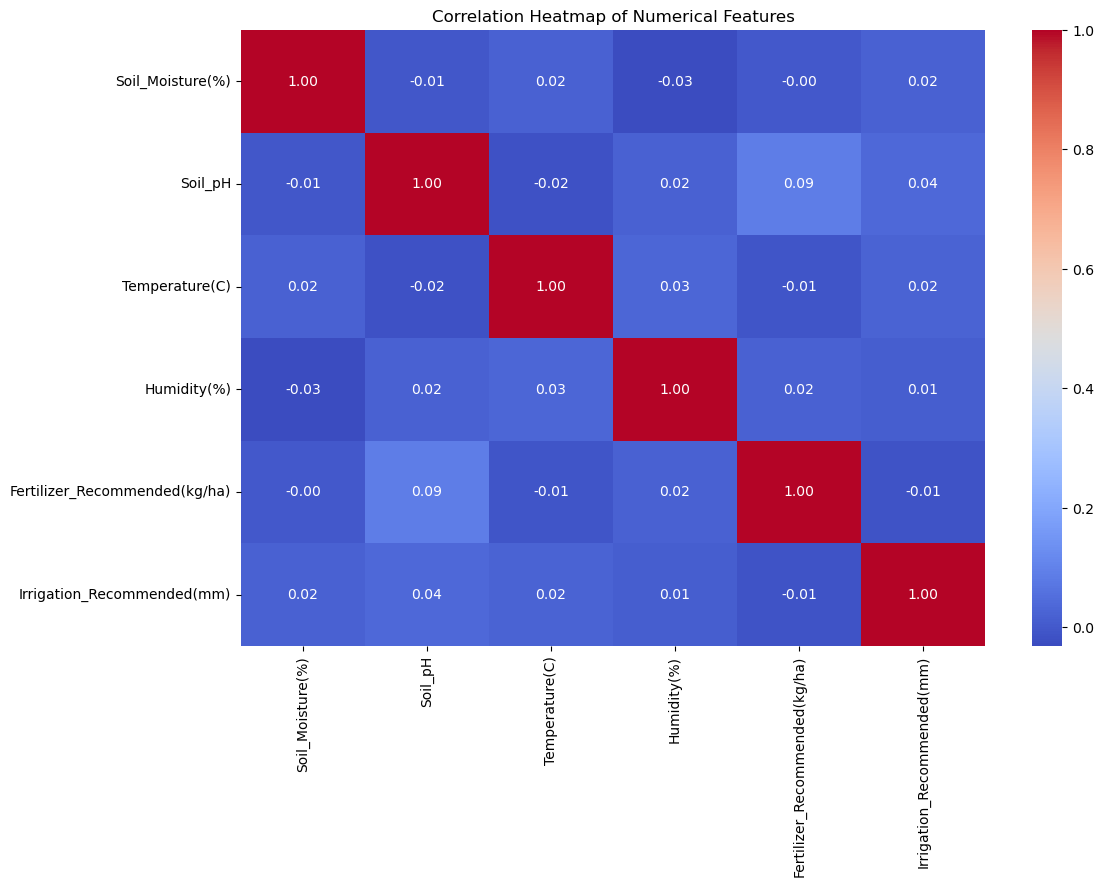

In [96]:
#correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [97]:
#most influencing fertilizer recommended
corr_fert = df[num_cols].corr()['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print("Correlation with Fertilizer Recommendation:\n", corr_fert)


Correlation with Fertilizer Recommendation:
 Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.085579
Humidity(%)                      0.017054
Soil_Moisture(%)                -0.001718
Temperature(C)                  -0.008135
Irrigation_Recommended(mm)      -0.012447
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [98]:
#croptype with highest average temperature
high_temp = df[df['Temperature(C)'] > 30]
irrigation_adj = high_temp.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean().sort_values(ascending=False)
print("Recommended Irrigation for Crops with Temp > 30°C:\n", irrigation_adj)

Recommended Irrigation for Crops with Temp > 30°C:
 Crop_Type
Tomatoes    18.919565
Wheat       18.811429
Beans       17.857692
Maize       16.625455
Lettuce     16.297297
Unknown     15.750000
Name: Irrigation_Recommended(mm), dtype: float64


In [ ]:
# Key Findings
print("Key Findings:")
print("- After analyzing the correlation heatmap,Fertilizer recommendations are mostly influenced by Soil_PH, Humidity and then Soil Moisture.")
print("- After analysing a bar graph from the grouped crop type dataframe that relates each crop type to its average soil moisture,the crop type with the highest average soil moisture is Wheat!")
#Suggestions
print("Suggestions:")   
print("-Increase the recommended irrigation water used to cater for the quick drying of the added moisture in the soil caused by the high temperatures above 30 degrees ")
print('-Increase the times the crops are irrigated for instance, if irrigation was carried out once a week, make it twice or thrice a week depending on the growth of the crops in response to the high temperatures.')
print('-Get data from the soil moisture sensors to determine which crops have a poor retention of water so as to increase the irrigation frequency for such crops.')
print('-Irrigate more in the early morning hours for example 5AM where the water loss in the soil is way less than during the day.')